In [172]:
# Import statements
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Make all numbers display raw instead of scientific
pd.set_option("display.float_format", "{:.2f}".format)

In [173]:
# Initial loading of data from CSV file
df = pd.read_csv("data/imdb_top_1000.csv")

In [174]:
# Let's look at how many columns, NaN, and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [175]:
# Look at DataFrame in the table format
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.60,A young New York socialite becomes interested ...,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.60,Sprawling epic covering the life of a Texas ca...,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.60,"In Hawaii in 1941, a private is cruelly punish...",85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [176]:
# Remove columns that won't be used in our analysis
df = df.drop("Poster_Link", axis=1)
df = df.drop("Certificate", axis=1)
df = df.drop("Overview", axis=1)
df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142 min,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.60,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,201 min,"Drama, Western",7.60,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.60,85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,97 min,"Drama, War",7.60,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [177]:
# Release Year, Runtime, and Gross have to be converted to number formats

# Turn bad Released Year data into good one
bad_rows = df[pd.to_numeric(df["Released_Year"], errors="coerce").isna()]
print(bad_rows[["Released_Year"]])

df.loc[966, "Released_Year"] = 1995

    Released_Year
966            PG


In [178]:

# Forcechange  Released Year to integer
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce").dropna().astype("Int64")

# Remove "min" from Runtime
df["Runtime"] = df["Runtime"].str.replace("min", "")
# Force change to integer
df["Runtime"] = pd.to_numeric(df["Runtime"], errors="coerce").dropna().astype("Int64")

# Let's turn the Gross column from string to int
# Have to remove the commas first
df["Gross"] = df["Gross"].str.replace(",", "")

# Force change to float -- astype doesn't work due to nulls
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")

df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.00
1,The Godfather,1972,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00
3,The Godfather: Part II,1974,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00
4,12 Angry Men,1957,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.60,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,201,"Drama, Western",7.60,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,118,"Drama, Romance, War",7.60,85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.00
998,Lifeboat,1944,97,"Drama, War",7.60,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   Int64  
 2   Runtime        1000 non-null   Int64  
 3   Genre          1000 non-null   object 
 4   IMDB_Rating    1000 non-null   float64
 5   Meta_score     843 non-null    float64
 6   Director       1000 non-null   object 
 7   Star1          1000 non-null   object 
 8   Star2          1000 non-null   object 
 9   Star3          1000 non-null   object 
 10  Star4          1000 non-null   object 
 11  No_of_Votes    1000 non-null   int64  
 12  Gross          831 non-null    float64
dtypes: Int64(2), float64(3), int64(1), object(7)
memory usage: 103.6+ KB


In [180]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.00,1000.00,1000.00,843.00,1000.00,831.00
mean,1991.22,122.89,7.95,77.97,273692.91,68034750.87
std,23.29,28.09,0.28,12.38,327372.70,109750043.19
min,1920.00,45.00,7.60,28.00,25088.00,1305.00
25%,1976.00,103.00,7.70,70.00,55526.25,3253559.00
50%,1999.00,119.00,7.90,79.00,138548.50,23530892.00
75%,2009.00,137.00,8.10,87.00,374161.25,80750893.50
max,2020.00,321.00,9.30,100.00,2343110.00,936662225.00


In [181]:
# Need to replace gross with gross adjusted column

# Make huge dictionary with years from 1920 to 2020 and Consumer Price Index of that year
cpi_dict = {
    1920: 20.0,
    1921: 17.9,
    1922: 16.8,
    1923: 17.1,
    1924: 17.1,
    1925: 17.5,
    1926: 17.7,
    1927: 17.4,
    1928: 17.1,
    1929: 17.1,

    1930: 16.7,
    1931: 15.2,
    1932: 13.7,
    1933: 13.0,
    1934: 13.4,
    1935: 13.7,
    1936: 13.9,
    1937: 14.4,
    1938: 14.1,
    1939: 13.9,

    1940: 14.0,
    1941: 14.7,
    1942: 16.3,
    1943: 17.3,
    1944: 17.6,
    1945: 18.0,
    1946: 19.5,
    1947: 22.3,
    1948: 24.1,
    1949: 23.8,

    1950: 24.1,
    1951: 26.0,
    1952: 26.5,
    1953: 26.7,
    1954: 26.9,
    1955: 26.8,
    1956: 27.2,
    1957: 28.1,
    1958: 28.9,
    1959: 29.1,

    1960: 29.6,
    1961: 29.9,
    1962: 30.2,
    1963: 30.6,
    1964: 31.0,
    1965: 31.5,
    1966: 32.4,
    1967: 33.4,
    1968: 34.8,
    1969: 36.7,

    1970: 38.8,
    1971: 40.5,
    1972: 41.8,
    1973: 44.4,
    1974: 49.3,
    1975: 53.8,
    1976: 56.9,
    1977: 60.6,
    1978: 65.2,
    1979: 72.6,

    1980: 82.4,
    1981: 90.9,
    1982: 96.5,
    1983: 99.6,
    1984: 103.9,
    1985: 107.6,
    1986: 109.6,
    1987: 113.6,
    1988: 118.3,
    1989: 124.0,

    1990: 130.7,
    1991: 136.2,
    1992: 140.3,
    1993: 144.5,
    1994: 148.2,
    1995: 152.4,
    1996: 156.9,
    1997: 160.5,
    1998: 163.0,
    1999: 166.6,

    2000: 172.2,
    2001: 177.1,
    2002: 179.9,
    2003: 184.0,
    2004: 188.9,
    2005: 195.3,
    2006: 201.6,
    2007: 207.3,
    2008: 215.3,
    2009: 214.5,

    2010: 218.1,
    2011: 224.9,
    2012: 229.6,
    2013: 233.0,
    2014: 236.7,
    2015: 237.0,
    2016: 240.0,
    2017: 245.1,
    2018: 251.1,
    2019: 255.7,
    2020: 258.8
}

current_year = 2020
df["GrossAdjusted"] = df.apply(
	lambda row: row["Gross"] *
		(
			cpi_dict[current_year] / cpi_dict.get(row["Released_Year"], cpi_dict[current_year])
		),
		axis=1
)

df
# So 169 movies are missing gross and gross adjusted

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,GrossAdjusted
0,The Shawshank Redemption,1994,142,Drama,9.30,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.00,49492389.86
1,The Godfather,1972,175,"Crime, Drama",9.20,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.00,835629358.06
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.00,642923201.61
3,The Godfather: Part II,1974,202,"Crime, Drama",9.00,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.00,300795943.20
4,12 Angry Men,1957,96,"Crime, Drama",9.00,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.00,40155444.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.60,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,NaN
996,Giant,1956,201,"Drama, Western",7.60,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,NaN
997,From Here to Eternity,1953,118,"Drama, Romance, War",7.60,85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.00,295632958.80
998,Lifeboat,1944,97,"Drama, War",7.60,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,NaN


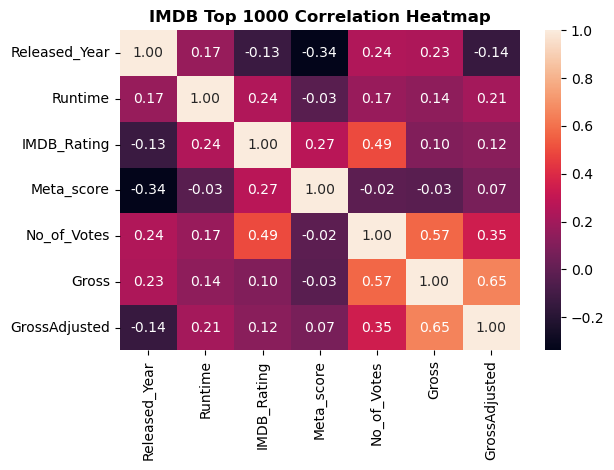

In [189]:
# Let's make a numeric dataframe so we can make a correlation heatmap
plt.figure()
corr = df.corr(numeric_only=True)
heatmap = sns.heatmap(
	corr,
	annot=True,
	fmt=".2f"
)

heatmap.set_title("IMDB Top 1000 Correlation Heatmap", weight="bold")

plt.tight_layout()
plt.show()